# Lower Back Pain Prediction with Decision Classifier Tree and Logistic Regression

![](https://media.giphy.com/media/2XflxzjlPftx97UOB2w/giphy.gif)

## Problem

In this Kaggle Notebook we would try to answer the following question: **given a set of data in several health factors, is it possible to predict lower back pain?**

## Proposed Solution

We would make use of **Normalization**, **Decision Tree Classifier** to evaluate feature importance, and **Logistic Regression** to first build our prediction model. Later, we would find out the coefficients of the independent variables, check accuracy metrics and visualize true/false positives and true/false negatives.

## Importing Libraries and Packages

### Visualization
* Matplotlib
* Seaborn

### Data Processing
* Numpy
* Pandas

### Regression
* Sklearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Exploratory Analysis

**First steps**
1. Importing the dataset
2. Finding out about its columns, shape, and dropping the last column
3. Visualizing the top 5 rows of the data

In [ ]:
df=pd.read_csv('../input/lower-back-pain-symptoms-dataset/Dataset_spine.csv')
df=pd.DataFrame(df)
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.drop(['Unnamed: 13'], axis=1, inplace=True)

In [ ]:
df.head()

The default columns' names don't gives us a lot of information, so we are renaming them with more descriptive headers. 

In [ ]:
columnas=['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
          'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt'
          'sacrum_angle','scoliosis_slope','result']

In [ ]:
df=df.rename(columns={'Col1':'pelvic_incidence', 'Col2':'pelvic tilt', 'Col3':'lumbar_lordosis_angle',
                      'Col4':'sacral_slope', 'Col5':'pelvic_radius', 'Col6':'degree_spondylolisthesis',
                      'Col7':'pelvic_slope', 'Col8':'direct_tilt', 'Col9':'thoracic_slope',
       'Col10':'cervical_tilt', 'Col11':'sacrum_angle', 'Col12':'scoliosis_slope', 'Class_att':'result'})
df.head()

Finding if there are null values in the dataset.

In [ ]:
df.isna().sum()

Changing the qualitative values to quantitative ones of our model

In [ ]:
df['result'][df['result']=='Abnormal']=1
df['result'][df['result']=='Normal']=0
df.head()

Now, we are creating a simple normalization function. You can see that the last column would stay the same because it will serve as our dependent variable.

In [ ]:
def normalize(dataset):
    DSNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    DSNorm["result"]=dataset["result"]
    return DSNorm

Our normalized dataset. Later, we are dividing our columns into independent and dependent variables. 

In [ ]:
dfnorm=normalize(df)
dfnorm.head()

In [ ]:
x=dfnorm.drop('result', axis = 1).values
y=dfnorm['result']

In [ ]:
y=y.astype(int)

Printing the shape to make sure the X and Y values aligned correctly

In [ ]:
print("X:",x.shape)
print("Y:",y.shape)

In [ ]:
featurest=['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
          'degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt'
          'sacrum_angle','scoliosis_slope']

Creating our **Decision Tree Classifier** in order to extract feature importance

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
plt.figure(figsize=(40,40))
xt, yt = load_iris(return_X_y=True)
dt = DecisionTreeClassifier()
dt = dt.fit(x, y)
tree.plot_tree(dt,feature_names=columnas,filled=True,rounded=True)


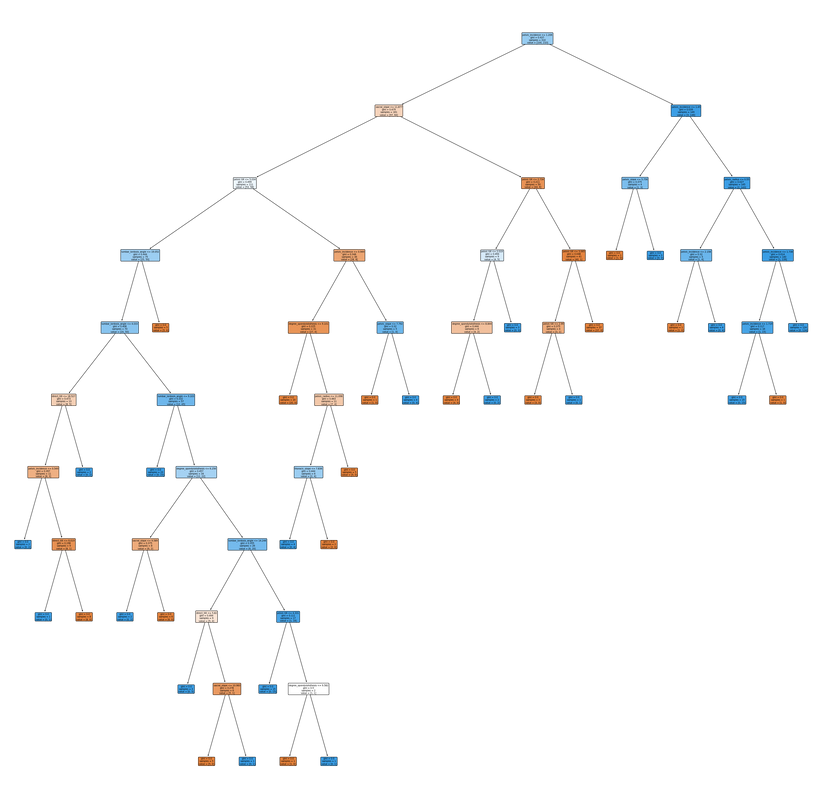

Importance of each feature in the dataset

In [ ]:
feat_name = []
importance = []

for i,column in enumerate(dfnorm.drop('result', axis = 1)):
    print('The Feature Importance for {} is : {}'.format(column.capitalize(), dt.feature_importances_[i]))
    
    feat_name.append(column)
    importance.append(dt.feature_importances_[i])

Visualizing our feature importance

In [ ]:
fi_df=zip(feat_name,importance)
fi_df=pd.DataFrame(fi_df,columns=["Feature","Score"])
fi_df

Feature Importance in descending order according to score

In [ ]:
fi_df=fi_df.sort_values('Score', ascending = False).reset_index()
columns_re=fi_df['Feature'][0:10]
fi_df

## Modeling

Now, we are creating our variables X and Y, printing their shapes, and getting them ready for **Logistic Regression**.

In [ ]:
x=dfnorm[columns_re].values
y=dfnorm['result']
y=y.astype(int)
print("X:",x.shape)
print("Y:",y.shape)

Dividing our data in training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8,test_size=0.2)
print("X_train:",x_train.shape)
print("Y_train:",y_train.shape,"\n")
print("Y_test:",y_test.shape)
print("X_test:",x_test.shape)

Fitting our **Logistic Regression Model** with the liblinear solver for our small dataset

In [ ]:
lr=LogisticRegression(solver = 'liblinear')
lr.fit(x, y)

In [ ]:
y_pred=lr.predict(x_train)
predict_proba=lr.predict_proba(x_train)

**Coefficients** of the independent variables

In [ ]:
lr.coef_

## Testing

The accuracy of our model

In [ ]:
print("Training Dataset Accuracy:",lr.score(x_train,y_train))
print("Testing Dataset Accuracy:",lr.score(x_test,y_test))

Our **Classification Report**

In [ ]:
print(classification_report(y_train,y_pred))

In [ ]:
cm=confusion_matrix(y_train,y_pred,normalize='true')
print(cm)

**Confussion Matrix** displaying True/False Positives and True/False Negatives

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
plot_confusion_matrix(lr,x_train,y_train,normalize='true', cmap='Blues',ax=ax, display_labels=lr.classes_)